In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [5]:
df_db_sfz = pd.read_table("../Data/DQDB.txt",sep=",")

In [6]:
df_db_sfz.head()

,MHZ,MSQRSFZ,年龄,性别,补贴金额,车辆数量,经济状况低保,护理补贴金额,建筑面积,类别,...,类别3,经济状况年龄段,经济状况人均150,支出型贫困救助金额,支出型贫困总收入,低保贫困总收入,临时贫困总收入,临时贫困救助金额,残疾等级,人均面积
0,卢连芳,330521198307012340,36,女,1557.90,NaN,NaN,NaN,NaN,农村低保,...,NaN,NaN,NaN,NaN,NaN,26400.0,NaN,NaN,NaN,NaN
1,汤福庆,330521194607132311,73,男,657.90,NaN,NaN,NaN,NaN,农村特困,...,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,NaN
2,沈叙林,330521192105245018,98,男,410.00,NaN,NaN,NaN,NaN,农村低保,...,NaN,NaN,NaN,NaN,NaN,720.0,NaN,NaN,NaN,NaN
3,张有昌,330521195103154212,68,男,1875.00,NaN,NaN,NaN,NaN,农村低保,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,沈镇海,330521199502063834,24,男,665.14,NaN,1.0,125.0,NaN,农村低保,...,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,三级,NaN


In [7]:
df_db_sfz=df_db_sfz.fillna(0)

In [8]:
df_db_sfz.head()

,MHZ,MSQRSFZ,年龄,性别,补贴金额,车辆数量,经济状况低保,护理补贴金额,建筑面积,类别,...,类别3,经济状况年龄段,经济状况人均150,支出型贫困救助金额,支出型贫困总收入,低保贫困总收入,临时贫困总收入,临时贫困救助金额,残疾等级,人均面积
0,卢连芳,330521198307012340,36,女,1557.90,0.0,0.0,0.0,0.0,农村低保,...,0.0,0.0,0.0,0.0,0.0,26400.0,0.0,0.0,0,0.0
1,汤福庆,330521194607132311,73,男,657.90,0.0,0.0,0.0,0.0,农村特困,...,0.0,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,0,0.0
2,沈叙林,330521192105245018,98,男,410.00,0.0,0.0,0.0,0.0,农村低保,...,0.0,0.0,0.0,0.0,0.0,720.0,0.0,0.0,0,0.0
3,张有昌,330521195103154212,68,男,1875.00,0.0,0.0,0.0,0.0,农村低保,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,沈镇海,330521199502063834,24,男,665.14,0.0,1.0,125.0,0.0,农村低保,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,三级,0.0


In [10]:
# df_db_sfz['SUM_CB_JE'] = df_db_sfz['SUM_CB_JE'].fillna(0)
# df_db_sfz['SUM_FC_MJ'] = df_db_sfz['SUM_FC_MJ'].fillna(0)
# df_db_sfz['SUM_GJJDK_JE'] = df_db_sfz['SUM_GJJDK_JE'].fillna(0)
# df_db_sfz['SUM_GJJJN_JE'] = df_db_sfz['SUM_GJJJN_JE'].fillna(0)
# df_db_sfz['SUM_SW_JE'] = df_db_sfz['SUM_SW_JE'].fillna(0)
df_db_sfz['MSQRSFZ'] = df_db_sfz['MSQRSFZ'].astype('str')
xb_mapping = {
           '男': 1,
           '女': 0}

df_db_sfz['性别'] = df_db_sfz['性别'].map(xb_mapping)


In [11]:
df_db_sfz.head(5)

,MHZ,MSQRSFZ,年龄,性别,补贴金额,车辆数量,经济状况低保,护理补贴金额,建筑面积,类别,...,类别3,经济状况年龄段,经济状况人均150,支出型贫困救助金额,支出型贫困总收入,低保贫困总收入,临时贫困总收入,临时贫困救助金额,残疾等级,人均面积
0,卢连芳,330521198307012340,36,0,1557.90,0.0,0.0,0.0,0.0,农村低保,...,0.0,0.0,0.0,0.0,0.0,26400.0,0.0,0.0,0,0.0
1,汤福庆,330521194607132311,73,1,657.90,0.0,0.0,0.0,0.0,农村特困,...,0.0,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,0,0.0
2,沈叙林,330521192105245018,98,1,410.00,0.0,0.0,0.0,0.0,农村低保,...,0.0,0.0,0.0,0.0,0.0,720.0,0.0,0.0,0,0.0
3,张有昌,330521195103154212,68,1,1875.00,0.0,0.0,0.0,0.0,农村低保,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,沈镇海,330521199502063834,24,1,665.14,0.0,1.0,125.0,0.0,农村低保,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,三级,0.0


In [8]:
df_db_sfz_num  = df_db_sfz.drop(['SFZ'],1)
# df_db_sfz_num.info()

In [12]:
df_db_sfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 22 columns):
MHZ          3346 non-null object
MSQRSFZ      3346 non-null object
年龄           3346 non-null int64
性别           3346 non-null int64
补贴金额         3346 non-null float64
车辆数量         3346 non-null float64
经济状况低保       3346 non-null float64
护理补贴金额       3346 non-null float64
建筑面积         3346 non-null float64
类别           3346 non-null object
类别1          3346 non-null float64
类别2          3346 non-null object
类别3          3346 non-null float64
经济状况年龄段      3346 non-null float64
经济状况人均150    3346 non-null float64
支出型贫困救助金额    3346 non-null float64
支出型贫困总收入     3346 non-null float64
低保贫困总收入      3346 non-null float64
临时贫困总收入      3346 non-null float64
临时贫困救助金额     3346 non-null float64
残疾等级         3346 non-null object
人均面积         3346 non-null float64
dtypes: float64(15), int64(2), object(5)
memory usage: 575.2+ KB


In [9]:
np_db_sfz = np.array(df_db_sfz_num)

In [10]:
# np_db_sfz_1 = np.array(df_db_sfz_num[['SUM_CB_JE','SUM_FC_MJ','SUM_GJJDK_JE','SUM_GJJJN_JE','SUM_SW_JE']])
np_db_sfz_1 = np.array(df_db_sfz_num[['SUM_CB_JE','SUM_GJJJN_JE','SUM_SW_JE']])
np_db_sfz_1_sum = np.array(np.sum(np_db_sfz_1,axis=1))
np_db_sfz_2 = np.array(df_db_sfz_num['SUM_ALL']) 
np_db_sfz_3 = np.array(df_db_sfz_num['DB_JE']) 
np_db_sfz_4 = np.array(df_db_sfz_num['NL']) 

np_db_sfz_5 = np.array(df_db_sfz_num['XB']) 

np_db_sum_AJE_XS = np.vstack((np_db_sfz_1_sum,np_db_sfz_2)).T
np_db_sum_AJE_DBJE = np.vstack((np_db_sfz_1_sum,np_db_sfz_3)).T
np_db_sum_XS_DBJE = np.vstack((np_db_sfz_2,np_db_sfz_3)).T


np_db_sum_XS_NL = np.vstack((np_db_sfz_4,np_db_sfz_2)).T
# print('np_db_sum_XS_NL',np_db_sum_XS_NL)
np_db_sum_AJE_NL = np.vstack((np_db_sfz_4,np_db_sfz_1_sum)).T
# print('np_db_sum_AJE_NL',np_db_sum_AJE_NL)
np_db_sum_XS_XB = np.vstack((np_db_sfz_5,np_db_sfz_2)).T

np_db_sum_XS_AJE_NL = np.vstack((np_db_sfz_2,np_db_sfz_4,np_db_sfz_1_sum)).T

np_db_sum_ALL =  np.vstack((np_db_sfz_1_sum,np_db_sfz_2,np_db_sfz_3)).T


df_db_sum_ALL = pd.DataFrame(np_db_sum_ALL)
dp_db_sum_XS_XB = pd.DataFrame(np_db_sum_XS_XB)
df_db_sum_AJE_NL = pd.DataFrame(np_db_sum_AJE_NL)
df_db_sum_XS_AJE_NL = pd.DataFrame(np_db_sum_XS_AJE_NL)


# 添加列名
df_db_sum_ALL.columns = ['AJE','XS', 'DBJE']
dp_db_sum_XS_XB.columns = ['XB','XS']
df_db_sum_AJE_NL.columns = ['NL','AJE']
df_db_sum_XS_AJE_NL.columns = ['XS','NL','AJE']

In [12]:
X = np_db_sum_XS_AJE_NL
estimator= KMeans(n_clusters=5)
y_pred =estimator.fit_predict(X)

np.savetxt("np_db_sum_XS_AJE_NL.txt", np_db_sum_XS_AJE_NL, fmt="%d", delimiter=",")
np.savetxt("y_pred.txt", y_pred, fmt="%d", delimiter=",")
df_db_sum_XS_AJE_NL.to_csv("df_db_sum_XS_AJE_NL.csv")
# np.savetxt("xy.txt", xy, fmt="%d", delimiter=",")

[9. 6.]


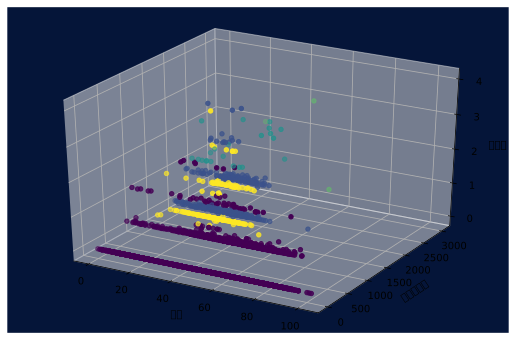

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%config InlineBackend.figure_format = 'svg'
fig = plt.figure(figsize=(9, 6))
# fig.set_facecolor('black')
axes = fig.add_subplot(111, projection='3d')

# fig = plt.subplots(1, figsize=(18, 8))

data = df_db_sum_XS_AJE_NL
x,y,z= data['NL'],data['AJE'],data['XS']

# 创建三维对象
# fig= plt.figure(figsize=(18, 8))
# ax = Axes3D(fig)
# axes = Axes3D(fig)
print(fig.get_size_inches())
# 绘制散点图
axes.scatter(x[:],y[:],z[:],c=y_pred)
# axes.scatter(x[:],y[:],z[:],c='r')
# axes.scatter(x[:],y[:],z[:],c='g')
# axes.patch.set_facecolor('black')
axes.patch.set_color('#051539')
# axes.patch.set_edgecolor('red')
zmajorLocator = MultipleLocator(1)
axes.zaxis.set_major_locator(zmajorLocator)
axes.xaxis.set_label_text('年龄')
axes.yaxis.set_label_text('月支出金额')
axes.zaxis.set_label_text('资产数')
# plt.xlabel('年龄  ',color='white')
# plt.ylabel('支出金额 ',color='white')
# plt.zlabel('资产数 ',color='white')
# 显示图像
plt.grid(colors='w')
plt.show()